In [ ]:
%pip install -qr requirements.txt # install

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [1]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-258-gf312738 Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)


Setup complete ✅ (8 CPUs, 15.5 GB RAM, 389.5/437.5 GB disk)


# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/LNwODJXcvt4'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [1]:
!python detect.py --cfg models/yolov5s_quant.yaml --weights experiment_models/yolov5s_quant_pre.pt --img 640 --conf 0.25 --source data/images/zidane.jpg
# display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['experiment_models/yolov5s_quant_pre.pt'], source=data/images/zidane.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, cfg=models/yolov5s_quant.yaml, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-257-gc7b9073 Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)


                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.QuantConv                 [3, 32, 6, 2, 2, 8, 8]        
  1                -1  1     18560  models.common.QuantConv                 [32, 64, 3, 2, None, 8, 8]    
  2                -1  1     18816  models

Output of NMS [tensor([[3.74365e+02, 4.90203e+01, 5.73692e+02, 3.66885e+02, 8.94587e-01, 0.00000e+00],
        [5.82615e+01, 1.18559e+02, 3.39845e+02, 3.68992e+02, 6.52116e-01, 0.00000e+00],
        [2.17404e+02, 1.96867e+02, 2.56147e+02, 3.99258e+02, 4.92365e-01, 2.70000e+01],
        [2.25845e+02, 2.35049e+02, 2.47866e+02, 3.60673e+02, 4.87191e-01, 2.70000e+01],
        [4.91485e+02, 1.68400e+02, 5.19788e+02, 2.19200e+02, 2.68638e-01, 2.70000e+01]], device='cuda:0')]
image 1/1 /home/omar/quant_yolov5/data/images/zidane.jpg: 384x640 2 0s, 3 27s, 112.1ms
Speed: 0.4ms pre-process, 112.1ms inference, 353.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp18


# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

# 3. Train

In [8]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 64 --epochs 3 --data coco128.yaml --weights '' --cache --cfg models/yolov1-tiny.yaml --classes 80

train: weights=, cfg=models/yolov1-tiny.yaml, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, classes=80, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-258-gf312738 Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0

Results saved to runs/train/exp64


# Train Pretrained

In [54]:
!python train.py --data coco128.yaml --weights 'yolov5s.pt' --cfg models/yolov5s.yaml --img 640 --epochs 1 

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, classes=80, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-258-gf312738 Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

# Train QuantModel, not pretrained

In [ ]:
# please do not forget to add the --cfg for quant models so the code does not break
!python train.py --img 416 --batch 16 --epochs 3 --data coco128.yaml --cfg models/yolov5s_quant.yaml  --batch-size 128 

In [ ]:
ckpt = {}
ckpt['model'] = model.state_dict()
torch.save(ckpt,"experiment_models/yolov5s.pt")

# Train Quantized (QAT)

In [9]:
# please do not forget to add the --cfg for quant models so the code does not break
!python train.py --img 640 --batch 32 --epochs 3 --data coco128.yaml --cfg models/yolov5s_quant.yaml --weights '' --batch-size 64 --classes 80 

train: weights=, cfg=models/yolov5s_quant.yaml, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, classes=80, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-258-gf312738 Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)

hyperparameters: lr0=0.001, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gam

# Train PostQuantization (PTQ)

In [16]:
!python train.py --img 640 --epochs 30 --batch-size 32 --data coco128.yaml --cfg models/yolov5s_quant.yaml --weights 'yolov5s.pt' --classes=80 

train: weights=yolov5s.pt, cfg=models/yolov5s_quant.yaml, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, classes=80, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-258-gf312738 Python-3.11.5 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)

hyperparameters: lr0=0.001, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4

 17                -1  1     90885  models.common.QuantC3                   [256, 128, 1, 8, 8, False]    
 18                -1  1    147713  models.common.QuantConv                 [128, 128, 3, 2, None, 8, 8]  
 19          [-1, 14]  1         0  models.common.Concat                    [1]                           
 20                -1  1    296453  models.common.QuantC3                   [256, 256, 1, 8, 8, False]    
 21                -1  1    590337  models.common.QuantConv                 [256, 256, 3, 2, None, 8, 8]  
 22          [-1, 10]  1         0  models.common.Concat                    [1]                           
 23                -1  1   1182725  models.common.QuantC3                   [512, 512, 1, 8, 8, False]    
 24      [17, 20, 23]  1    229245  models.yolo.Detect                      [80, [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], [128, 256, 512], True, 8]
YOLOv5s_quant summary: 3329 layers, 6865333 parameters, 68

# Inference Pretrained Model

In [56]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model_pre = torch.hub.load('.',
                       'custom',
                       'experiment_models/yolov5s.pt',
                       source='local',
                       classes = 80,
                       cfg = "models/yolov5s.yaml",
                       force_reload=True
                      )

im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model_pre(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

YOLOv5 🚀 v7.0-258-gf312738 Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)


                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  mod

In [ ]:
for key,value in model_pre.state_dict().items():
    print(key,value)

# Inference Quantized Model (QAT)

In [9]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model_p = torch.hub.load('.',
                       'custom',
                       'experiment_models/yolov5s_pre.pt',
                       source='local',
                       classes = 80,
                       cfg = "models/yolov5s.yaml",
                       force_reload=True
                      )

model_q = torch.hub.load('.',
                       'custom',
                       'experiment_models/yolov1_quant_test.pt',
                       source='local',
                       classes = 80,
                       cfg = "models/yolov1-tiny.yaml",
                       force_reload=True
                      )

im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model_q(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

YOLOv5 🚀 v7.0-258-gf312738 Python-3.10.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12044MiB)


                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  mod

In [10]:
results.pandas().xywhn

[    xcenter   ycenter     width    height  confidence  class name
 0  0.736700  0.536733  0.302685  0.878313    0.861109      0    0
 1  0.320783  0.635903  0.432169  0.717317    0.680102      0    0
 2  0.367520  0.757153  0.047367  0.485694    0.672160     27   27
 3  0.782470  0.505915  0.037359  0.154763    0.311816     27   27]

# Inference Quantized Model (PTQ)

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('.',
                       'custom',
                       'experiment_models/yolov5s_quant.pt',
                       source='local',
                       classes = 80,
                       cfg = "models/yolov5s_quant.yaml",
                       force_reload=True
                      )

im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

In [ ]:
df = results.pandas()
df.xyxy

In [ ]:
model_quant(im)

# Copying weights for PTQ

In [ ]:
model.model.model.model[0].conv.weight.data

In [ ]:
model_quant_state = model_quant.state_dict()
model_state = model.state_dict()

for key,value in model_quant_state.items():
    if key in model_state:
        #pass
        #print(key)
        model_quant_state[key] = value
    else:
        print("NotFound",key)
        
#model_quant.load_state_dict(model_quant_state)

In [ ]:
model_quant.model.model.model[0].conv.weight.data

In [ ]:
model_quant.load_state_dict(model.state_dict())

# Save Model

In [37]:
model_q.modules()

<generator object Module.modules at 0x7eff98127bc0>

In [51]:
newmodel = torch.nn.Sequential(*[model_q.model.model.model[i] for i in range(15)])

In [52]:
newmodel

Sequential(
  (0): QuantConv(
    (conv): QuantConv2d(
      3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
      (input_quant): ActQuantProxyFromInjector(
        (_zero_hw_sentinel): StatelessBuffer()
      )
      (output_quant): ActQuantProxyFromInjector(
        (_zero_hw_sentinel): StatelessBuffer()
      )
      (weight_quant): WeightQuantProxyFromInjector(
        (_zero_hw_sentinel): StatelessBuffer()
        (tensor_quant): RescalingIntQuant(
          (int_quant): IntQuant(
            (float_to_int_impl): RoundSte()
            (tensor_clamp_impl): TensorClampSte()
            (delay_wrapper): DelayWrapper(
              (delay_impl): _NoDelay()
            )
          )
          (scaling_impl): StatsFromParameterScaling(
            (parameter_list_stats): _ParameterListStats(
              (first_tracked_param): _ViewParameterWrapper(
                (view_shape_impl): OverTensorView()
              )
              (stats): _Stats(
                (stats_impl): 

In [42]:
(list(model_q.modules())[:-1])

[AutoShape(
   (model): DetectMultiBackend(
     (model): DetectionModel(
       (model): Sequential(
         (0): QuantConv(
           (conv): QuantConv2d(
             3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
             (input_quant): ActQuantProxyFromInjector(
               (_zero_hw_sentinel): StatelessBuffer()
             )
             (output_quant): ActQuantProxyFromInjector(
               (_zero_hw_sentinel): StatelessBuffer()
             )
             (weight_quant): WeightQuantProxyFromInjector(
               (_zero_hw_sentinel): StatelessBuffer()
               (tensor_quant): RescalingIntQuant(
                 (int_quant): IntQuant(
                   (float_to_int_impl): RoundSte()
                   (tensor_clamp_impl): TensorClampSte()
                   (delay_wrapper): DelayWrapper(
                     (delay_impl): _NoDelay()
                   )
                 )
                 (scaling_impl): StatsFromParameterScaling(
                

In [24]:
newmodel = torch.nn.Sequential(*(list(model_q.model.model.model.modules())[:539]))

In [25]:
newmodel

Sequential(
  (0): Sequential(
    (0): QuantConv(
      (conv): QuantConv2d(
        3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
        (input_quant): ActQuantProxyFromInjector(
          (_zero_hw_sentinel): StatelessBuffer()
        )
        (output_quant): ActQuantProxyFromInjector(
          (_zero_hw_sentinel): StatelessBuffer()
        )
        (weight_quant): WeightQuantProxyFromInjector(
          (_zero_hw_sentinel): StatelessBuffer()
          (tensor_quant): RescalingIntQuant(
            (int_quant): IntQuant(
              (float_to_int_impl): RoundSte()
              (tensor_clamp_impl): TensorClampSte()
              (delay_wrapper): DelayWrapper(
                (delay_impl): _NoDelay()
              )
            )
            (scaling_impl): StatsFromParameterScaling(
              (parameter_list_stats): _ParameterListStats(
                (first_tracked_param): _ViewParameterWrapper(
                  (view_shape_impl): OverTensorView()
            

In [20]:
newmodel[0].model.model

DetectionModel(
  (model): Sequential(
    (0): QuantConv(
      (conv): QuantConv2d(
        3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)
        (input_quant): ActQuantProxyFromInjector(
          (_zero_hw_sentinel): StatelessBuffer()
        )
        (output_quant): ActQuantProxyFromInjector(
          (_zero_hw_sentinel): StatelessBuffer()
        )
        (weight_quant): WeightQuantProxyFromInjector(
          (_zero_hw_sentinel): StatelessBuffer()
          (tensor_quant): RescalingIntQuant(
            (int_quant): IntQuant(
              (float_to_int_impl): RoundSte()
              (tensor_clamp_impl): TensorClampSte()
              (delay_wrapper): DelayWrapper(
                (delay_impl): _NoDelay()
              )
            )
            (scaling_impl): StatsFromParameterScaling(
              (parameter_list_stats): _ParameterListStats(
                (first_tracked_param): _ViewParameterWrapper(
                  (view_shape_impl): OverTensorView()
    

In [10]:
from brevitas.export import export_finn_onnx
import torch

IN_CH = 384
OUT_CH = 640
BATCH_SIZE = 1

path = 'experiment_models/yolov1_quant.onnx'
inp = torch.randn(BATCH_SIZE,3, IN_CH, OUT_CH).cuda()

detection_model = model_q.model.model
detection_model.cuda()
detection_model.eval()

exported_model = export_finn_onnx(detection_model, inp, path, opset_version=12)

In [21]:
model_q.model.model.model[0].conv.weight

Parameter containing:
tensor([[[[ 3.74569e-03,  1.29232e-01,  1.35577e-01,  2.93213e-01,  1.65933e-01,  1.44947e-01],
          [ 9.63387e-02,  2.50656e-01,  2.85795e-01,  3.87307e-01,  2.50461e-01,  1.71985e-01],
          [ 6.16392e-02,  2.41481e-01,  3.79889e-01,  4.75935e-01,  2.03219e-01,  7.09119e-02],
          [ 8.02822e-02,  1.92873e-01,  2.96141e-01,  3.53925e-01,  5.89550e-02, -4.02875e-02],
          [-1.50023e-01, -7.87693e-02, -4.30205e-02, -1.42263e-02, -2.47338e-01, -3.22886e-01],
          [-2.79353e-01, -2.77791e-01, -3.38113e-01, -2.40895e-01, -3.66028e-01, -3.46312e-01]],

         [[-2.56708e-02,  1.49828e-02, -2.91847e-02,  1.05904e-01,  4.51679e-02,  1.16153e-01],
          [ 9.74124e-02,  1.86918e-01,  1.61638e-01,  2.31330e-01,  1.24645e-01,  1.30404e-01],
          [ 1.14006e-01,  2.29573e-01,  3.02388e-01,  3.49045e-01,  9.16047e-02,  3.55780e-02],
          [ 1.35675e-01,  1.70716e-01,  2.03219e-01,  2.23131e-01, -7.82813e-02, -8.68707e-02],
          [-8.30

# Clean Coco Data

In [4]:
import os

def count_files_in_directory(directory_path):
    # Get the list of files in the directory
    files = os.listdir(directory_path)

    # Count the number of files
    file_count = len(files)

    return file_count


train_img_path = "../datasets/coco128/images/train2017"  
train_label_path = "../datasets/coco128/labels/train2017" 
train_img_dir = os.listdir(train_img_path)
train_label_dir = os.listdir(train_label_path)

val_img_path = "../datasets/coco128/images/val2017"  
val_label_path = "../datasets/coco128/labels/val2017" 
val_img_dir = os.listdir(val_img_path)
val_label_dir = os.listdir(val_label_path)

In [5]:
train_img_len = count_files_in_directory(train_img_path)
train_label_len = count_files_in_directory(train_label_path)

val_img_len = count_files_in_directory(val_img_path)
val_label_len = count_files_in_directory(val_label_path)

print(train_img_len, train_label_len)
print(val_img_len, val_label_len)

train_img_files = [img_path.replace(".jpg",".txt") for img_path in train_img_dir]

train_imgs_to_delete = list(set(train_img_files) ^ set(train_label_dir))
train_imgs_to_delete = [img_path.replace(".txt",".jpg") for img_path in train_imgs_to_delete]

for train_img_to_delete in train_imgs_to_delete:
    path = train_img_path + "/" + train_img_to_delete
    if os.path.exists(path):
        os.remove(path)
    
print(len(os.listdir(train_img_path)))

val_img_files = [img_path.replace(".jpg",".txt") for img_path in val_img_dir]

val_imgs_to_delete = list(set(val_img_files) ^ set(val_label_dir))
val_imgs_to_delete = [img_path.replace(".txt",".jpg") for img_path in val_imgs_to_delete]

for val_img_to_delete in val_imgs_to_delete:
    path = val_img_path + "/" + val_img_to_delete
    if os.path.exists(path):
        os.remove(path)
    
print(len(os.listdir(val_img_path)))

71749 71749
3035 3035
71749
3035


000000177934.jpg
../datasets/coco128/images/train2017


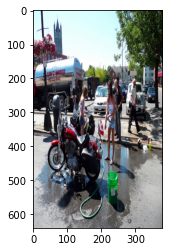

In [38]:
import cv2
from matplotlib import pyplot as plt

idx = 2

image_path = val_img_dir[idx]
print(image_path)
print(train_img_path)

img = cv2.imread(val_img_path + "/" + image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(380,640))

plt.imshow(img)
plt.show()

In [39]:
label_path = val_label_path + "/000000177934.txt"
with open(label_path, 'r') as file:
    # Read the content of the file
    file_content = file.read()

    # Print the content
    print(file_content)

2 0.9030781250000001 0.39038541666666665 0.07290624999999999 0.0820625
2 0.5254375 0.4170729166666666 0.11734375 0.12539583333333332
2 0.6955 0.38253125000000004 0.06253125000000001 0.08397916666666667
2 0.7914218749999999 0.40525 0.1526875 0.154125
2 0.5139453125 0.37804166666666666 0.07670312500000001 0.062875
3 0.310953125 0.5865104166666666 0.4028125 0.3550625
3 0.32606250000000003 0.480125 0.0818125 0.18758333333333335
0 0.59209375 0.5135208333333333 0.0818125 0.383375
0 0.389953125 0.46066666666666667 0.06859375 0.23550000000000001
0 0.6638359374999999 0.45465625000000004 0.065859375 0.29210416666666666
0 0.77696875 0.44718749999999996 0.1045 0.26516666666666666
0 0.33109375 0.38014583333333335 0.07003125 0.15783333333333335
6 0.2006796875 0.3469375 0.401359375 0.26758333333333334
6 0.45754687499999996 0.3593541666666667 0.1130625 0.1005
0 0.6272578125 0.39093749999999994 0.029515625 0.15358333333333332
2 0.8833046875000001 0.37071875 0.065609375 0.07139583333333334
6 0.673679687